In [2]:
from matplotlib import pyplot as plt
%matplotlib inline 
%load_ext autoreload
import train3
import imageProcessor  
from PIL import Image

import numpy as np
import model


%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# preprocess image before training
# or skip this process if preprocessed folder exist
#imageProcessor.main()   self.saver.save(self.sess, ./saver  + "model.ckpt")

In [4]:
#del trainer # if one wants to run script again, This saves memory

# Training 

In [6]:
trainer =  train3.TensorFlowTrainer()

Total data loaded : 24
starting data train/test separation ...
completed separation


In [5]:
trainer.predict()

Training model ...
Strating Lauching of the segmentation model...



training_loss => 0.91 for step 0
training_loss => 0.91 for step 1
training_loss => 0.91 for step 2


In [7]:
trainer.predict(restore=True,validation=True)

Training model ...
INFO:tensorflow:Restoring parameters from /home/bigdata-lap/Desktop/ML exercises/savedModel/model.ckpt
Strating Lauching of the segmentation model...



Validating Model ...
training_loss / validation_loss => 0.91 / 0.91 for step 0
Validating Model ...
training_loss => 0.91 for step 1
Validating Model ...
training_loss / validation_loss => 0.91 / 0.91 for step 2


In [12]:
# use the train loss list to plot loss
print(len( trainer.trainloss))
loss = []
prediction = []
for i in trainer.trainloss:
    loss.append(i[0][0])
    prediction.append(i[0][1])
    

3


In [ ]:
# use the validation  loss list to plot loss
# this is if you set validation to true
print(len( trainer.validationloss))
valloss = []
valprediction = []
for i in trainer.validationloss:
    valloss.append(i[0][0])
    #valprediction.append(i[0][1])
    

Text(0.5, 0, 'Training epoch')

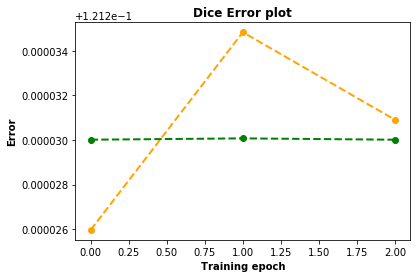

In [19]:
plt.plot(loss, 'o--', linewidth=2,color='orange')
#plt.plot(valloss, 'o--', linewidth=2,color='green') # uncomment if you set validation to true

plt.title("Dice Error plot",fontweight='bold')
plt.ylabel("Error",fontweight='bold')
plt.xlabel("Training epoch",fontweight='bold')

In [27]:
def imageSeg(img):
    '''
    display 

    '''
    img = Image.fromarray(np.uint8(img * 255) , 'L')
    img.show()

In [34]:
# to view some of the predicted image
imageSeg(prediction[0][2])

In [38]:
# image segment for the validation set
imageSeg(valprediction[0][2])

# Test Model

In [4]:
#tester =  train3.TensorFlowTrainer(validation=False) 
# set validation to true if you trained with validation==true
#  otherwise tensorflow wont be able to load the graph since the key parameters would be different


Total data loaded : 24


In [9]:
trainer.predict(restore=True, test=True)

Model restored (restore set to true.
starting model testing
INFO:tensorflow:Restoring parameters from /home/bigdata-lap/Desktop/ML exercises/savedModel/model.ckpt


In [3]:
tester.predict(restore=True, test=True)

starting data train/test separation ...
completed separation

Model restored (restore set to true.
starting model testing
INFO:tensorflow:Restoring parameters from /home/bigdata-lap/Desktop/mypapers/Road_Segment_Identification_CNN-master/ML exercise/ML exercises/savedModel/model.ckpt




In [13]:
# use the train loss list to plot loss

testloss = []
testprediction = []
for i in tester.collector:
    testloss.append(i[0][0])
    testprediction.append(i[0][1])

Text(0.5, 0, 'Training epoch')

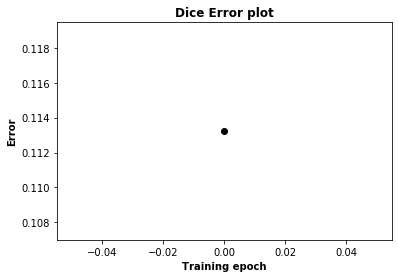

In [14]:
plt.plot(testloss, 'o--', linewidth=2,color='black')


plt.title("Dice Error plot",fontweight='bold')
plt.ylabel("Error",fontweight='bold')
plt.xlabel("Training epoch",fontweight='bold')